In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_excel('HaSample3Y.xlsx')

In [3]:
print(df)

    Week Start     Bookings
0   2021-08-01   385.520873
1   2021-08-08   290.988905
2   2021-08-15   429.624335
3   2021-08-22   605.104608
4   2021-08-29   509.228475
..         ...          ...
151 2024-06-23   420.453159
152 2024-06-30   343.655794
153 2024-07-07   424.127625
154 2024-07-14   569.688425
155 2024-07-21  1279.608535

[156 rows x 2 columns]


In [4]:
df.head()

,Week Start,Bookings
0,2021-08-01,385.520873
1,2021-08-08,290.988905
2,2021-08-15,429.624335
3,2021-08-22,605.104608
4,2021-08-29,509.228475


In [5]:
df.tail()

,Week Start,Bookings
151,2024-06-23,420.453159
152,2024-06-30,343.655794
153,2024-07-07,424.127625
154,2024-07-14,569.688425
155,2024-07-21,1279.608535


In [6]:
df.set_index('Week Start',inplace=True)

In [7]:
df.head()

,Bookings
Week Start,
2021-08-01,385.520873
2021-08-08,290.988905
2021-08-15,429.624335
2021-08-22,605.104608
2021-08-29,509.228475


In [8]:
df.describe()

,Bookings
count,156.000000
mean,479.127974
std,281.458166
min,115.436058
25%,325.642219
50%,404.949307
75%,525.250246
max,1772.016998


In [45]:
#Step 2. Visualize the Data

<Axes: xlabel='Week Start'>

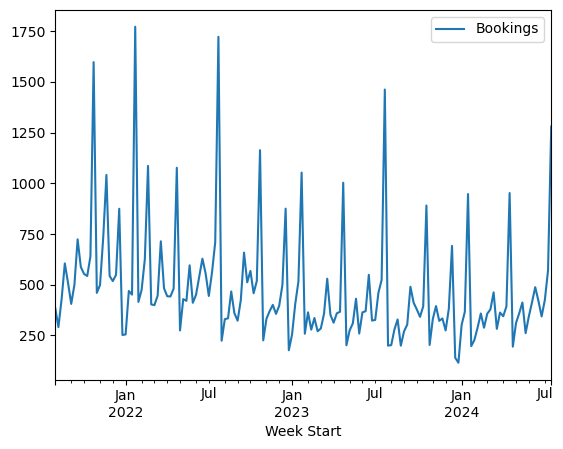

In [9]:
df.plot()

In [10]:
###Testing for Stationarity

from statsmodels.tsa.stattools import adfuller

In [11]:
#Null Hypo: It is non stationary
#Alternate Hypo: It is stationary

def adfuller_test(Bookings):
    result=adfuller(Bookings)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=.05:
        print("Strong evidence against null hypo")
    else:
        print("Weak evidence against null hypo")

In [12]:
adfuller_test(df['Bookings'])

ADF Test Statistic:-1.6090451415747158
p-value:0.4790484101045573
#Lags Used:13
Number of Observations Used:142
Weak evidence against null hypo


In [14]:
#### If it is non stationary we have to make it Stationary
### Differencing
df['Seasonal First Difference']=df['Bookings']-df['Bookings'].shift(13)

In [15]:
df.head(15)

,Bookings,Seasonal First Difference
Week Start,,
2021-08-01,385.520873,NaN
2021-08-08,290.988905,NaN
2021-08-15,429.624335,NaN
2021-08-22,605.104608,NaN
2021-08-29,509.228475,NaN
2021-09-05,405.504429,NaN
2021-09-12,499.804035,NaN
2021-09-19,723.763450,NaN
2021-09-26,587.689166,NaN


In [18]:
### Again performing adfuller_test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic:-3.462735984537039
p-value:0.008997302830138092
#Lags Used:13
Number of Observations Used:129
Strong evidence against null hypo


<Axes: xlabel='Week Start'>

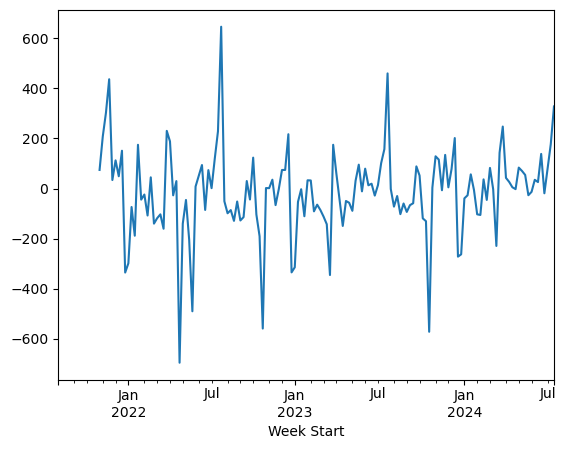

In [19]:
### Now data is stationary as p value is less than .05
df['Seasonal First Difference'].plot()

In [20]:
#### Auto Regressive Model- Autocorrelation and Partial Autocorrelation

### For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [20]:
#### ARIMA has 3 parts- auto regressive (AR model), differencing and moving average
#### AR Model is done with PACF (Partial Autocorrelation)
### p- AR model lags,d- differencing,q- Moving avg lags
### we have 26 NaN so 27th onwards data is coming
# p=1, q= acf better than pacf as no exponentail decrease =0 or 1, d=1 as 1 time it has been shifted
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Bookings'],order=(1,1,1),seasonal_order=(1,1,1,13))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [31]:
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86195D+00    |proj g|=  5.74167D-02

At iterate    5    f=  5.84438D+00    |proj g|=  2.39269D-03

At iterate   10    f=  5.83810D+00    |proj g|=  1.11901D-02


 This problem is unconstrained.



At iterate   15    f=  5.77269D+00    |proj g|=  6.25104D-02

At iterate   20    f=  5.76885D+00    |proj g|=  6.93949D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   1.709D-06   5.769D+00
  F =   5.7688470857033964     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<Axes: xlabel='Week Start'>

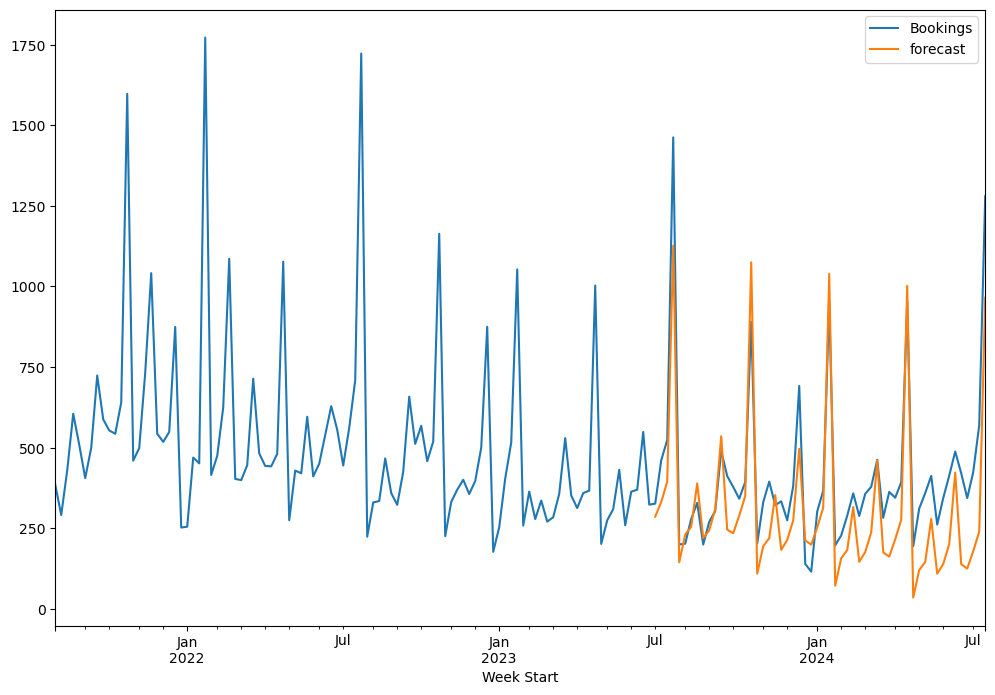

In [32]:
df['forecast']=results.predict(start=100, end = 155, dynamic=True) # testing the model performance with sample input
df[['Bookings','forecast']].plot(figsize=(12,8))

In [33]:
### Predicting future forecast
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(weeks=x)for x in range(0,53)] # Creating future weeks- 53 weeks placeholder

In [34]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dataset_df.index.name = 'Week Start'

In [35]:
future_dataset_df.head()

,Bookings,Seasonal First Difference,forecast
Week Start,,,
2024-07-28,NaN,NaN,NaN
2024-08-04,NaN,NaN,NaN
2024-08-11,NaN,NaN,NaN
2024-08-18,NaN,NaN,NaN
2024-08-25,NaN,NaN,NaN


In [36]:
# fill NaN values with float
future_dataset_df['Bookings']= future_dataset_df['Bookings'].fillna(0.0)
future_dataset_df['Seasonal First Difference']= future_dataset_df['Seasonal First Difference'].fillna(0.0)
future_dataset_df['forecast']= future_dataset_df['forecast'].fillna(0.0)
future_dataset_df.head()

,Bookings,Seasonal First Difference,forecast
Week Start,,,
2024-07-28,0.0,0.0,0.0
2024-08-04,0.0,0.0,0.0
2024-08-11,0.0,0.0,0.0
2024-08-18,0.0,0.0,0.0
2024-08-25,0.0,0.0,0.0


In [37]:
# fill NaN values with float for original dataframe
df['Bookings']= df['Bookings'].fillna(0.0)
df['Seasonal First Difference']= df['Seasonal First Difference'].fillna(0.0)
df['forecast']= df['forecast'].fillna(0.0)
df.head()

,Bookings,Seasonal First Difference,forecast
Week Start,,,
2021-08-01,385.520873,0.0,0.0
2021-08-08,290.988905,0.0,0.0
2021-08-15,429.624335,0.0,0.0
2021-08-22,605.104608,0.0,0.0
2021-08-29,509.228475,0.0,0.0


In [38]:
future_df=pd.concat([df,future_dataset_df])

<Axes: xlabel='Week Start'>

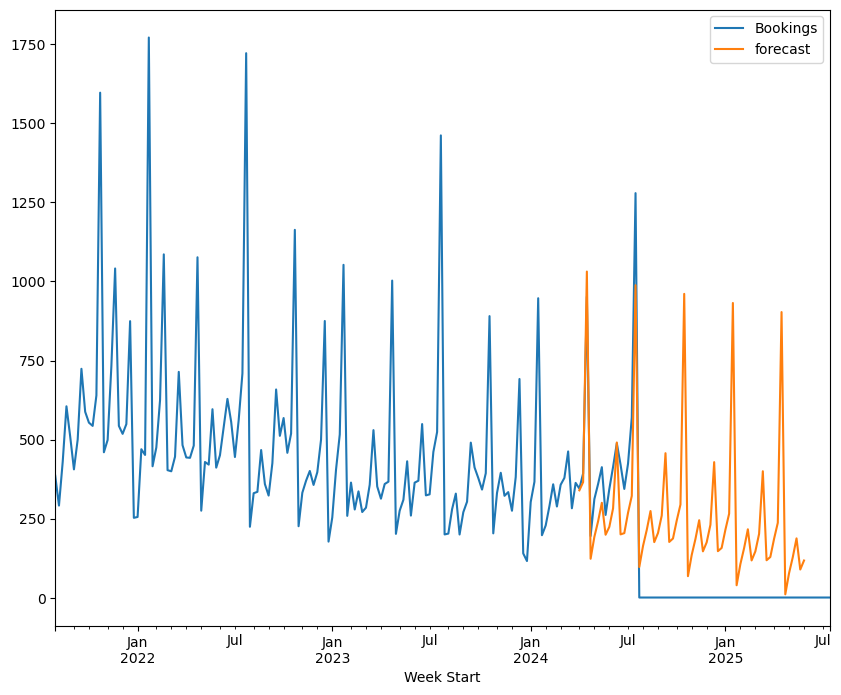

In [63]:
future_df['forecast']=results.predict(start=140, end=200, dynamic=True)
future_df[['Bookings','forecast']].plot(figsize=(10,8))

In [62]:
future_df[future_df['forecast'].notna()] # check the forecast values along with the bookings for the last weeks

,Bookings,Seasonal First Difference,forecast
Week Start,,,
2024-04-07,344.701770,42.441576,339.167619
2024-04-14,392.630123,26.300678,365.180354
2024-04-21,952.054404,5.011142,1031.471317
2024-04-28,194.615813,-2.496353,122.644879
2024-05-05,311.356034,83.454040,191.779041
...,...,...,...
2025-05-04,0.000000,0.000000,76.910379
2025-05-11,0.000000,0.000000,127.665177
2025-05-18,0.000000,0.000000,187.114134
